In [1]:
import IPython.display as ipd
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

import utilty

# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (8, 3)
ipd.display(ipd.HTML("<style>.container { width:100% !important; }</style>"))

In [94]:
track = utilty.get_audio_tracks()[0]
track = utilty.find_file('without')

sec = 30
duration = utilty.get_duration(track)
segments = int(duration) // sec
audio_30secs = [lr.load(track, offset=sec*i, duration=sec) 
                for i in range(segments)]
name = track.stem.split('-')[-1].replace('_', ' ').title()
track

PosixPath('/Users/matteding/Desktop/Whabam/tracks/eminem-2002-the_eminem_show-10-without_me.mp3')

In [95]:
chroma_syncs = [utilty.beat_synchronous_chroma(audio) for audio, _ in audio_30secs]
chromas, _ = zip(*chroma_syncs)

In [96]:
bounds = [lr.segment.agglomerative(chroma, 20) for chroma in chromas]
bound_widths = np.diff(bounds)

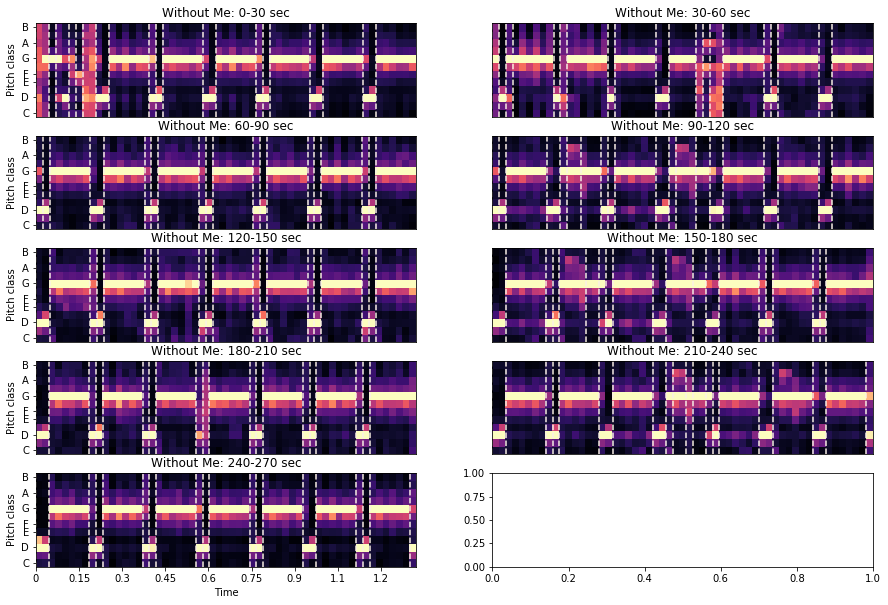

In [101]:
cols = 2
size = int(np.ceil(segments / cols))
fig, axes = plt.subplots(size, cols, figsize=(15, size*2))

for i, ((chroma, beat), bound_f, axis) in enumerate(zip(chroma_syncs, bounds, axes.ravel())):    
    lr.display.specshow(chroma, ax=axis, x_axis='time', y_axis='chroma')#, x_coords=beat)
    
    bound_t = lr.frames_to_time(bound_f)
    axis.vlines(bound_t, 0, chroma.shape[0], color='linen', linestyle='--')
    
    utilty.label_formatter(axis)
    axis.set_title(f'{name}: {30*i}-{30*(i+1)} sec')

In [98]:
bound_width_aggs = utilty.get_aggregations(bound_widths, axis=0)
chroma_aggs = [utilty.get_aggregations(chroma, axis=1) for chroma in chromas]

In [100]:
assert bound_widths.shape[0] == len(chroma_aggs) == segments

__TODO (Chroma):__ use a single pitch to determine which index corresponds to each note

In [5]:
from importlib import reload
reload(utilty);